# CA2 Deep Learning Assignment [GAN] [Part A]

- Name: Jaysoorya Rajendran / Tay Yikoon Lomibao
- Admin Number: P2309024 / P2309389
- Class: DAAA/FT/2A/01

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import os
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow import expand_dims
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, Concatenate, Embedding, Normalization
from tensorflow.keras.layers import BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomNormal
import numpy as np
import os
import matplotlib.pyplot as plt
from random import randint
from numpy import ones, zeros
from numpy.random import randn

In [2]:
data = pd.read_csv('../emnist-letters-train.csv')

In [3]:
data

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99034,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99035,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99036,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99037,-1,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174


In [4]:
data.shape

(99039, 785)

In [5]:
# Filter out rows where the first column (labels) has a value of -1
data_without_blank = data[data.iloc[:, 0] != -1]

# Extract labels and image pixel values
labels = data_without_blank.iloc[:, 0].values  # First column as labels
images = data_without_blank.iloc[:, 1:].values  # Rest of the columns as image pixel values

# Get the number of images and pixels
num_images = images.shape[0]
num_pixels = images.shape[1]

# Assuming square images
image_size = int(np.sqrt(num_pixels))

# Reshape the images to 2D
images = images.reshape(num_images, image_size, image_size)

print("Shape of labels:", labels.shape)
print("Shape of images:", images.shape)
print("Size of Images:", image_size, "x", image_size, "pixels")

Shape of labels: (88799,)
Shape of images: (88799, 28, 28)
Size of Images: 28 x 28 pixels


# Standardization to -1 and 1

In [6]:
# pre_processing_v1 = Normalization()
# pre_processing_v1.adapt(images)

In [7]:
print(np.max(images[0]))

255


In [8]:
# Changing it to -1 to 1
images = images.astype('float32')
images /= (255/2)
images -= 1

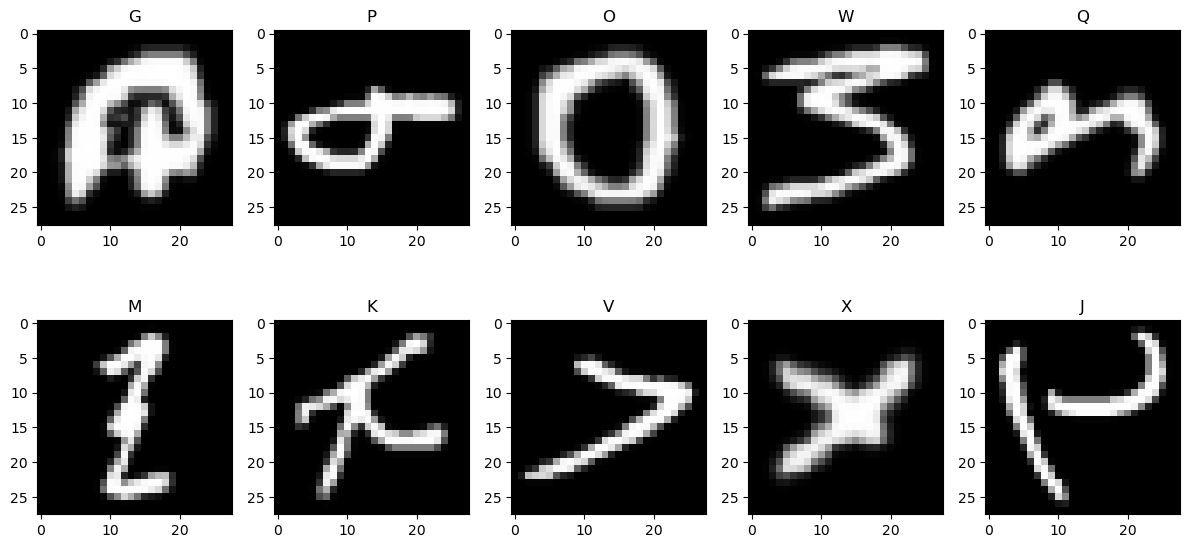

In [9]:
# EMNIST labels are 1-indexed, with '1' corresponding to 'A', '2' to 'B', ..., '26' to 'Z'
label_to_letter = {i: chr(ord('A') + i - 1) for i in range(1, 27)}

# Display the first 10 images with grids, axis labels, and class labels
num_plot = 10
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < num_plot:
        ax.imshow(images[i], cmap='gray')
        label = label_to_letter[labels[i]]
        ax.set_title(f'{label}', fontsize=12)  # Add title with class label

plt.tight_layout()
plt.show()


In [10]:
# Flip the images horizontally so that they are right-side up
images = np.array([np.rot90(np.flipud(img), k=3) for img in images])

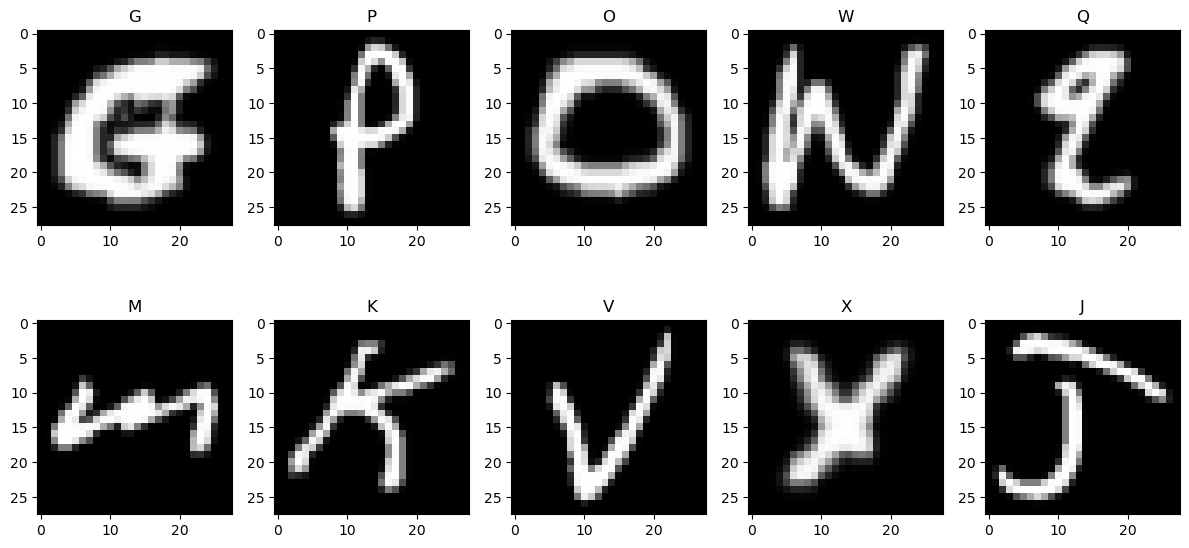

In [11]:
# EMNIST labels are 1-indexed, with '1' corresponding to 'A', '2' to 'B', ..., '26' to 'Z'
label_to_letter = {i: chr(ord('A') + i - 1) for i in range(1, 27)}

# Display the first 10 images with grids, axis labels, and class labels
num_plot = 10
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < num_plot:
        ax.imshow(images[i], cmap='gray')
        label = label_to_letter[labels[i]]
        ax.set_title(f'{label}', fontsize=12)  # Add title with class label

plt.tight_layout()
plt.show()

# Class Weights

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming labels contains the labels from 1 to 26 for A to Z
# and images contains the corresponding images

# Map numerical labels to corresponding letters
label_to_letter = {i: chr(ord('A') + i - 1) for i in range(1, 27)}

# Initialize list to store the number of images per class
num_images_per_class = []

# Loop through each class index and count the number of images
for class_idx in range(1, 27):
    class_images = images[labels == class_idx]
    num_images_per_class.append(len(class_images))
    print(f"{label_to_letter[class_idx]}: {len(class_images)} images")

print("\nNumber of images per class:", num_images_per_class)



A: 3396 images
B: 3396 images
C: 3419 images
D: 3398 images
E: 3437 images
F: 3394 images
G: 3385 images
H: 3424 images
I: 3428 images
J: 3402 images
K: 3438 images
L: 3415 images
M: 3402 images
N: 3365 images
O: 3408 images
P: 3430 images
Q: 3435 images
R: 3419 images
S: 3392 images
T: 3436 images
U: 3419 images
V: 3422 images
W: 3422 images
X: 3437 images
Y: 3453 images
Z: 3427 images

Number of images per class: [3396, 3396, 3419, 3398, 3437, 3394, 3385, 3424, 3428, 3402, 3438, 3415, 3402, 3365, 3408, 3430, 3435, 3419, 3392, 3436, 3419, 3422, 3422, 3437, 3453, 3427]


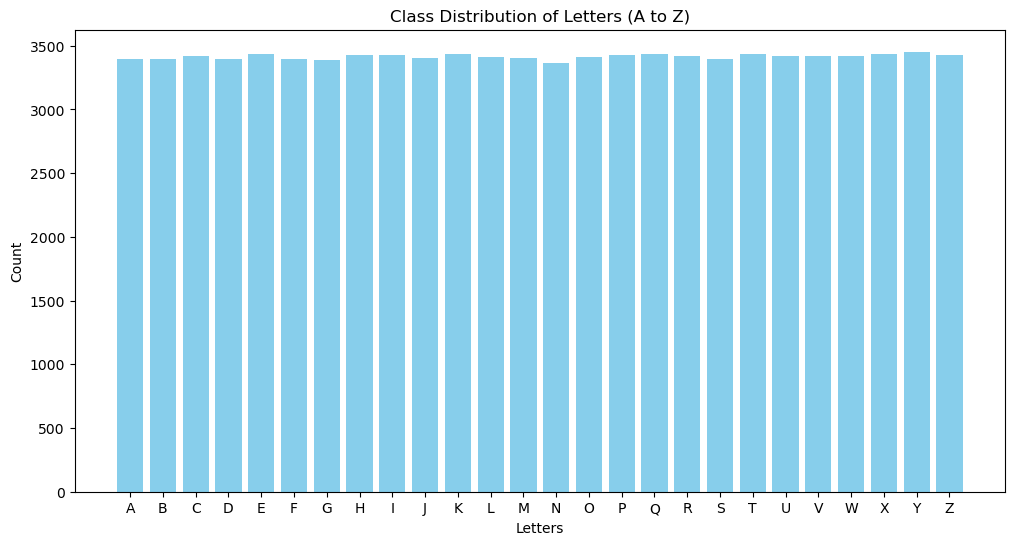

In [13]:
# Plotting the class distribution
letters = [label_to_letter[i] for i in range(1, 27)]
plt.figure(figsize=(12, 6))
plt.bar(letters, num_images_per_class, color='skyblue')
plt.xlabel('Letters')
plt.ylabel('Count')
plt.title('Class Distribution of Letters (A to Z)')
plt.show()

# Image Averaging

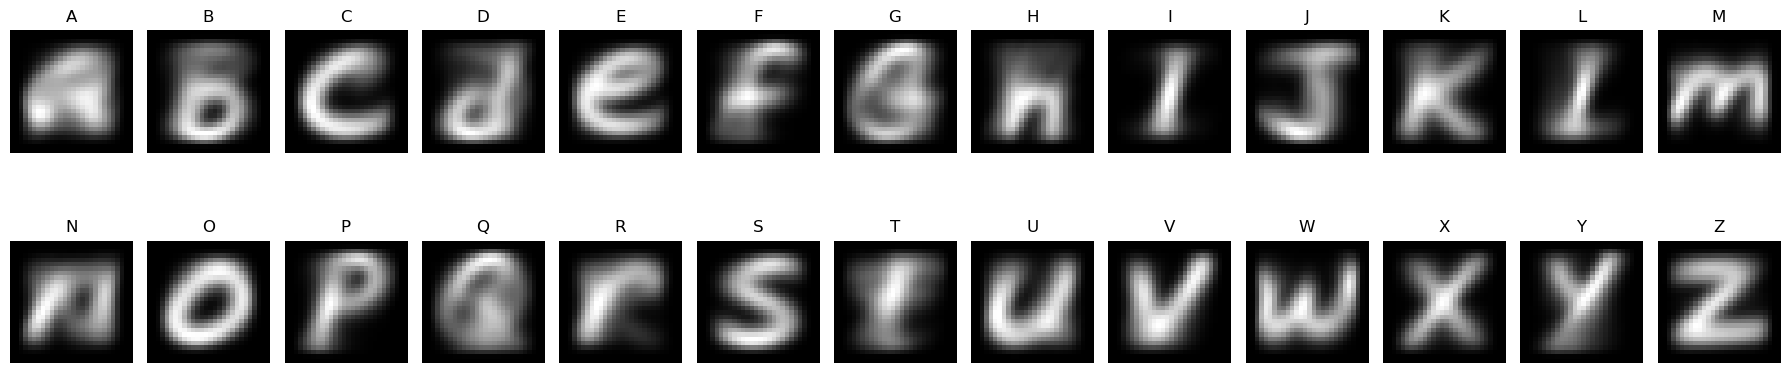

In [14]:
# Assuming images and labels are already defined

# EMNIST labels are 1-indexed, with '1' corresponding to 'A', '2' to 'B', ..., '26' to 'Z'
label_to_letter = {i: chr(ord('A') + i - 1) for i in range(1, 27)}

# Get the number of images and pixels
num_images = images.shape[0]
image_size = images.shape[1]

# Initialize a dictionary to hold the sum of images and count for each label
image_sums = {letter: np.zeros((image_size, image_size), dtype=np.float32) for letter in label_to_letter.values()}
image_counts = {letter: 0 for letter in label_to_letter.values()}

# Sum the images for each label
for img, label in zip(images, labels):
    if label in label_to_letter:
        letter = label_to_letter[label]
        image_sums[letter] += img
        image_counts[letter] += 1
    else:
        print(f"Unexpected label {label} encountered. Skipping this entry.")

# Calculate the average images
average_images = {letter: image_sums[letter] / image_counts[letter] for letter in image_sums.keys()}

# Display the average images
fig, axes = plt.subplots(2, 13, figsize=(18, 5))

for i, (letter, avg_img) in enumerate(average_images.items()):
    ax = axes.flat[i]
    ax.imshow(avg_img, cmap='gray', interpolation='nearest')  # 'nearest' to avoid blurring
    ax.set_title(f'{letter}')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Reshaping the labels

In [15]:
labels = labels.astype(np.int32).reshape(-1, 1)

# Check the data type of the labels
print(f"The data type of labels is: {labels.dtype}")
print(f"The shape of labels is: {labels.shape}")

The data type of labels is: int32
The shape of labels is: (88799, 1)


# Checking 1st Image

In [16]:
first_image = images[0]
first_label = labels[0]
# Check the shape of the first image
if len(first_image.shape) == 2:
    height, width = first_image.shape
    channels = 1  # Grayscale image has 1 channel
    print(f"Height: {height}, Width: {width}, Channels: {channels}")
elif len(first_image.shape) == 3:
    height, width, channels = first_image.shape
    print(f"Height: {height}, Width: {width}, Channels: {channels}")
else:
    print("Unexpected image shape:", first_image.shape)

print("Image Shape:", first_image.shape)
print("Label:", first_label.shape)

Height: 28, Width: 28, Channels: 1
Image Shape: (28, 28)
Label: (1,)


# Data Augmentation

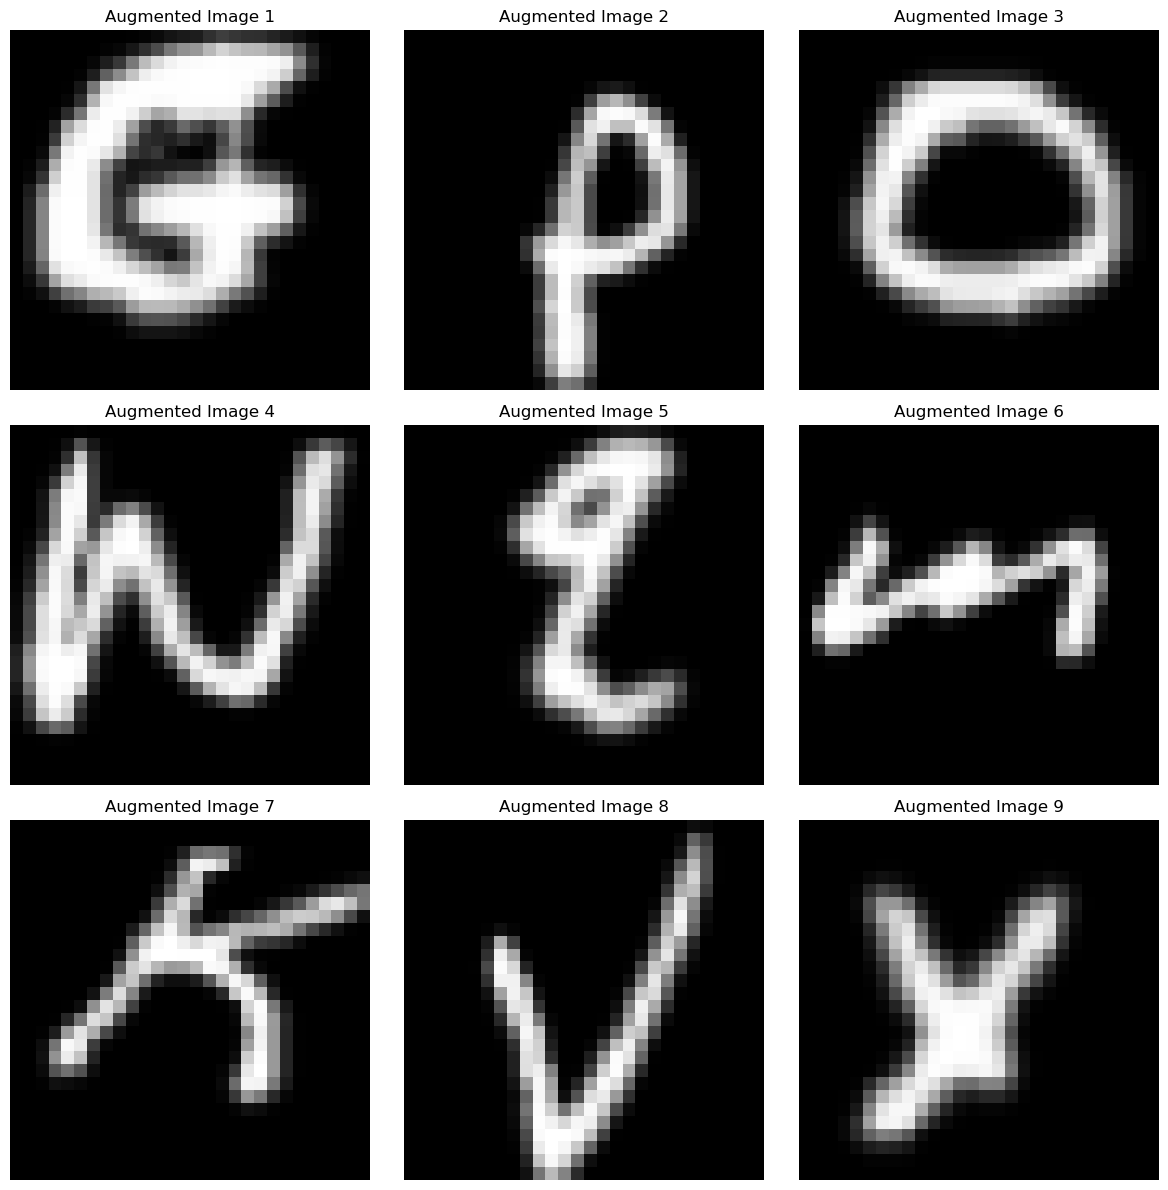

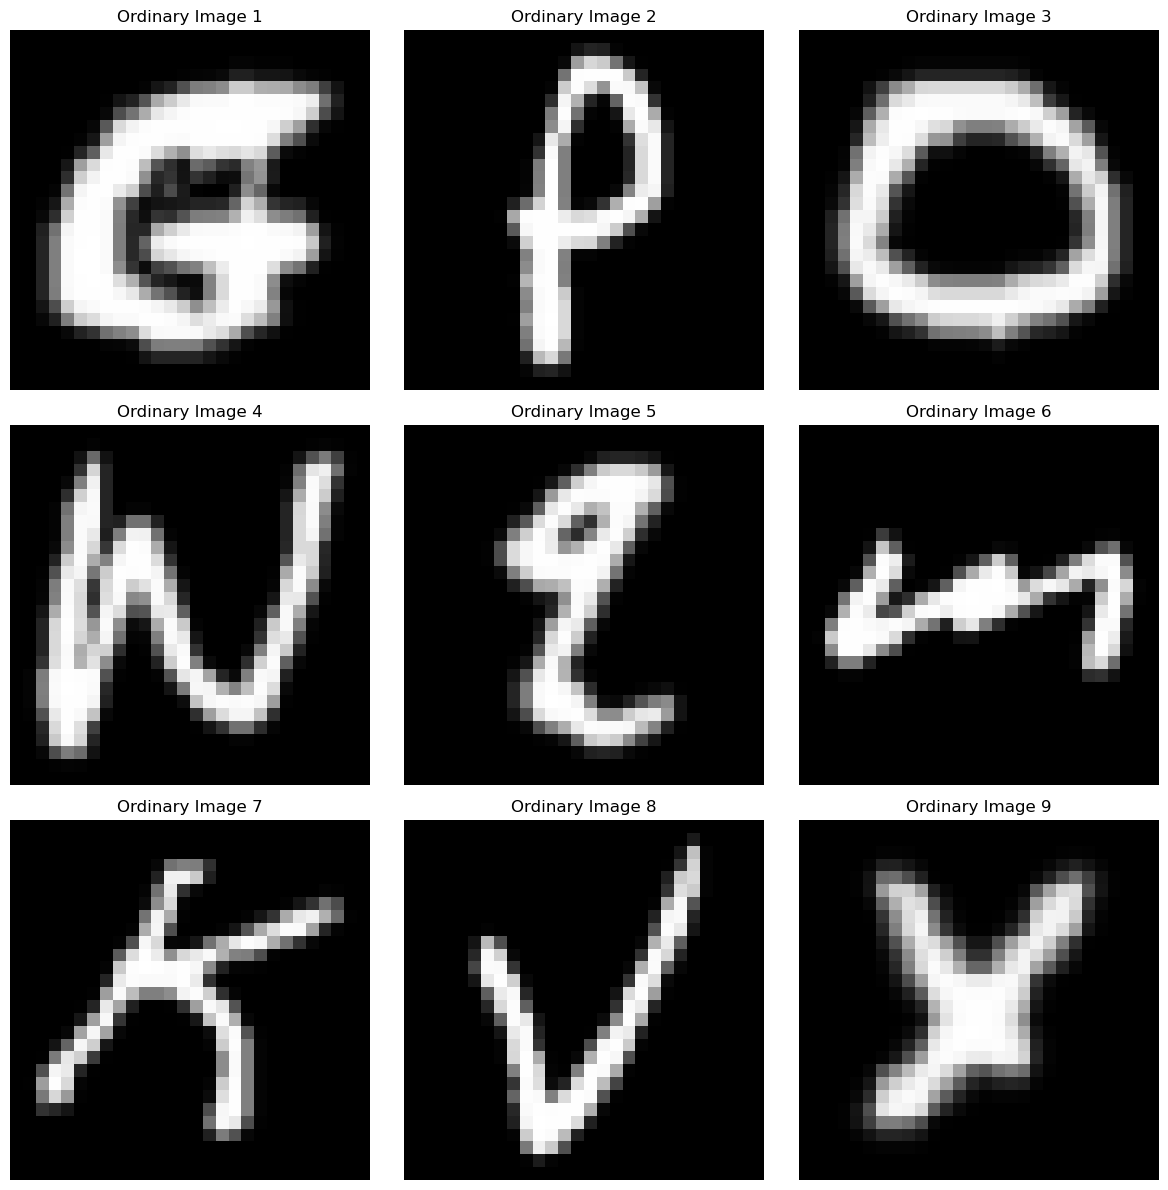

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming 'images' is your image dataset and 'labels' are corresponding labels
images = np.expand_dims(images, axis=-1)  # Expand dimensions to include channel (if not already)

# Initialize the ImageDataGenerator with the desired augmentations
datagen = ImageDataGenerator(
    width_shift_range=0.1,    # Horizontal shift up to 10% of image width
    height_shift_range=0.1,   # Vertical shift up to 10% of image height
    zoom_range=0.1,        # Zoom up to 10%
    shear_range=0.2,       # Shear up to 10%
)

# Generate augmented images
image_generator = datagen.flow(images, labels, batch_size=len(images), shuffle=False)
images_aug, labels_aug = next(image_generator)

# Double the labels to match the augmented images
labels = np.concatenate((labels, labels_aug), axis=0)

# Concatenate the original images with the augmented images
images = np.concatenate((images, images_aug), axis=0)

# Visualize some of the augmented images
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_aug[i], cmap='gray')  # Display in grayscale
    plt.axis('off')
    plt.title(f'Augmented Image {i+1}', fontsize=12)  # Add title for each subplot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# visualize some of the combined images
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray')  # Display in grayscale
    plt.axis('off')
    plt.title(f'Ordinary Image {i+1}', fontsize=12)  # Add title for each subplot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()



## New Shape

In [18]:
print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)

print("\n-----------------------------\n")

print("Number of Dimensions of Images:", images.ndim)
print("Number of Dimensions of Labels:", labels.ndim)

print("\n-----------------------------\n")

print("Data Type of Images:", images.dtype)
print("Data Type of Labels:", labels.dtype)

Shape of images: (177598, 28, 28, 1)
Shape of labels: (177598, 1)

-----------------------------

Number of Dimensions of Images: 4
Number of Dimensions of Labels: 2

-----------------------------

Data Type of Images: float32
Data Type of Labels: int32


## EarlyStopping Callback (?)

In [19]:
import tensorflow as tf
print(tf.__version__)

2.10.0


# ACGAN (Conditional GAN) ( Training based on labelling )

In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Embedding, multiply, LeakyReLU, BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, ZeroPadding2D, GlobalMaxPooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

## Changing the label to categorical for ACGAN

In [21]:
labels = labels - 1

np.min(labels)

0

In [22]:
from tensorflow.keras.utils import to_categorical

label = to_categorical(labels, num_classes=26)

In [23]:
label.shape

(177598, 26)

In [24]:
images.shape

(177598, 28, 28, 1)

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Reshape, Input, Flatten, Conv2D, Conv2DTranspose, BatchNormalization, Dropout, Activation
from tensorflow.keras.layers import multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import KLDivergence, BinaryCrossentropy

class ACGAN:
    def __init__(self, img_shape, num_classes, latent_dim=100):
        self.img_shape = img_shape
        self.num_classes = num_classes
        self.latent_dim = latent_dim
        self.generator = self.build_generator()
        self.discriminator = self.build_discriminator()
        self.acgan = self.build_acgan(self.generator, self.discriminator)

        discriminator_optimizer = Adam(learning_rate=0.00002, beta_1=0.5)
        optimizer = Adam(learning_rate=0.0001, beta_1=0.5)
        
        # Compile discriminator
        self.discriminator.compile(loss=['binary_crossentropy', 'sparse_categorical_crossentropy'],
                                   optimizer=discriminator_optimizer,
                                   metrics=['accuracy'])
        
        self.discriminator.trainable = False
        
        # Compile ACGAN
        self.acgan.compile(loss=['binary_crossentropy', 'sparse_categorical_crossentropy'],
                           optimizer=optimizer)

    def build_generator(self):
        init = RandomNormal(stddev=0.02)
        # model = Sequential()
        # model.add(Dense(units=7 * 7 * 128, input_dim=self.latent_dim))
        # model.add(Activation('relu'))
        # model.add(Reshape((7, 7, 128)))
        # model.add(Conv2DTranspose(filters=64, kernel_size=3, strides=2, padding='same'))
        # model.add(Activation('relu'))
        # model.add(BatchNormalization(momentum=0.8))
        # model.add(Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same'))
        # model.add(Activation('relu'))
        # model.add(BatchNormalization(momentum=0.8))
        # model.add(Conv2DTranspose(filters=self.img_shape[2], kernel_size=3, strides=1, padding='same'))
        # model.add(Activation('tanh'))  # Output layer with tanh activation

        # label input
        in_label = Input(shape=(1,))
        # embedding for categorical input
        li = Embedding(self.num_classes, 50)(in_label)
        # linear multiplication
        n_nodes = 7 * 7
        li = Dense(n_nodes, kernel_initializer=init)(li)
        # reshape to additional channel
        li = Reshape((7, 7, 1))(li)
        # image generator input
        in_lat = Input(shape=(self.latent_dim,))
        # foundation for 7x7 image
        n_nodes = 384 * 7 * 7
        gen = Dense(n_nodes, kernel_initializer=init)(in_lat)
        gen = Activation('relu')(gen)
        gen = Reshape((7, 7, 384))(gen)
        # merge image gen and label input
        merge = Concatenate()([gen, li])
        # upsample to 14x14
        gen = Conv2DTranspose(192, (5,5), strides=(2,2), padding='same', kernel_initializer=init)(merge)
        gen = BatchNormalization()(gen)
        gen = Activation('relu')(gen)
        # upsample to 28x28
        gen = Conv2DTranspose(1, (5,5), strides=(2,2), padding='same', kernel_initializer=init)(gen)
        out_layer = Activation('tanh')(gen)

        return Model([in_lat, in_label], out_layer)

    def build_discriminator(self):
        init = RandomNormal(stddev=0.2)
        model = Sequential()
        model.add(Conv2D(filters=32, kernel_size=3, strides=2, input_shape=self.img_shape, padding='same', kernel_initializer=init))
        # model.add(Activation('relu'))
        # model.add(Conv2D(filters=64, kernel_size=3, strides=2, padding='same'))
        # model.add(Activation('relu'))
        # model.add(BatchNormalization(momentum=0.8))
        # model.add(Dropout(0.3))
        # model.add(Flatten())
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.5))
        model.add(Conv2D(filters=64, kernel_size=3, padding='same', kernel_initializer=init))
        model.add(BatchNormalization())
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.5))
        model.add(Conv2D(256, (3,3), padding='same', kernel_initializer=init))
        model.add(BatchNormalization())
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.5))
        model.add(Flatten())

        # Output two values: validity and label prediction
        validity = Dense(1, activation='sigmoid', name='validity')(model.output)
        label_pred = Dense(self.num_classes, activation='softmax', name='label_pred')(model.output)

        return Model(model.input, [validity, label_pred])

    def build_acgan(self, g_model, d_model):
         # connect the outputs of the generator to the inputs of the discriminator
        gan_output = d_model(g_model.output)
        # define gan model as taking noise and label and outputting real/fake and label outputs
        model = Model(g_model.input, gan_output)
        # compile model
        opt = Adam(lr=0.0002, beta_1=0.5)
        model.compile(loss=['binary_crossentropy', 'sparse_categorical_crossentropy'], optimizer=opt)
        return model

    def train(self, images, labels_input, epochs=10000, batch_size=256, save_interval=500, gen_steps=1):
        os.makedirs('ACGAN_Generated_Images', exist_ok=True)
        X_train = images
        y_train = labels_input

        for epoch in range(epochs):
            # Train Discriminator
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            labels_real = np.ones((batch_size, 1))  # Real labels

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_labels = np.random.randint(0, self.num_classes, (batch_size, 1))
            gen_imgs = self.generator.predict([noise, gen_labels])
            labels_fake = np.zeros((batch_size, 1))  # Fake labels

            d_loss_real = self.discriminator.train_on_batch(imgs, [labels_real, y_train[idx]])
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, [labels_fake, gen_labels])
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train Generator
            g_loss = None
            for _ in range(gen_steps):
                noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
                gen_labels = np.random.randint(0, self.num_classes, (batch_size, 1))
                valid_y = np.ones((batch_size, 1))
                g_loss = self.acgan.train_on_batch([noise, gen_labels], [valid_y, gen_labels])

            # Print the progress
            print(f"{epoch + 1}/{epochs} [D loss: {d_loss[0]}, acc.: {100 * d_loss[3]:.2f}%] "
                f"[G loss: {g_loss[0]}]")

            # Save generated images at save intervals
            if (epoch + 1) % save_interval == 0:
                self.save_images(epoch + 1)

    def save_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_labels = np.random.randint(0, self.num_classes, (r * c, 1))
        gen_imgs = self.generator.predict([noise, gen_labels])
        # gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]

        fig, axs = plt.subplots(r, c, figsize=(10, 10))
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i, j].set_title(f"Label: {chr(gen_labels[cnt][0] + 65)}")
                axs[i, j].axis('off')
                cnt += 1
        fig.suptitle(f"Generated images at epoch {epoch}", fontsize=16)
        fig.savefig(f"ACGAN_Generated_Images/acgan_{epoch}.png")
        plt.close()

## Running the ACGAN Model

In [28]:
# Create an ACGAN instance
acgan = ACGAN(img_shape=(28, 28, 1), num_classes=26)

# Train the ACGAN
acgan.train(images, labels, epochs=25001, batch_size=128, save_interval=1000, gen_steps=2)

4/4 [==============================] - 0s 42ms/step


# SAGAN (Self-Attention CGAN)

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, Conv2D, Conv2DTranspose, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Layer, Add, Multiply
from tensorflow.keras.models import Sequential, Model
from keras.layers import ZeroPadding2D
from tensorflow.keras.optimizers import Adam

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, BatchNormalization, Activation, Conv2D, Conv2DTranspose, LeakyReLU, Dropout, ZeroPadding2D, Add, Layer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

class MultiHeadSelfAttention(Layer):
    def __init__(self, channels, num_heads=8, reduce_channels=4):
        super(MultiHeadSelfAttention, self).__init__()
        self.channels = channels
        self.num_heads = num_heads
        self.reduce_channels = reduce_channels

        self.query_conv = Conv2D(channels // reduce_channels, kernel_size=1)
        self.key_conv = Conv2D(channels // reduce_channels, kernel_size=1)
        self.value_conv = Conv2D(channels, kernel_size=1)
        self.gamma = tf.Variable(initial_value=tf.zeros((1,), dtype=tf.float32), trainable=True)

    def call(self, inputs):
        batch_size, height, width, num_channels = inputs.get_shape().as_list()

        # Project inputs to query, key, and value features
        query = self.query_conv(inputs)
        key = self.key_conv(inputs)
        value = self.value_conv(inputs)

        # Reshape and split features for multi-head attention
        query = tf.reshape(query, (batch_size, height * width, self.num_heads, self.channels // self.num_heads))
        key = tf.reshape(key, (batch_size, height * width, self.num_heads, self.channels // self.num_heads))
        value = tf.reshape(value, (batch_size, height * width, self.num_heads, self.channels // self.num_heads))

        # Calculate attention scores for each head
        attention = tf.matmul(query, key, transpose_b=True)
        attention = attention / (self.channels // self.num_heads) ** 0.5  # Scaling for stability
        attention = tf.nn.softmax(attention, axis=-1)

        # Weight values using attention scores and concatenate heads
        out = tf.matmul(attention, value)
        out = tf.reshape(out, (batch_size, height, width, self.channels))

        # Final scaling and residual connection
        return self.gamma * out + inputs

class SAGAN:
    def __init__(self, img_shape, latent_dim=100):
        self.img_shape = img_shape
        self.latent_dim = latent_dim
        self.optimizer = Adam(learning_rate=0.0001)  # Lower learning rate

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', optimizer=self.optimizer, metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates images
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model (stacked generator and discriminator)
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=self.optimizer)

    def build_generator(self):
        model = Sequential()

        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim))
        model.add(Reshape((7, 7, 128)))
        model.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))
        model.add(MultiHeadSelfAttention(128))  # Self-attention layer
        model.add(Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))

        # Add residual connection (skip connection) for potentially better learning
        skip_connection = Conv2D(64, kernel_size=1, padding='same')(model.layers[1].output)
        model.add(Conv2D(64, kernel_size=3, padding='same'))
        model.add(Activation("relu"))
        model.add(Conv2D(64, kernel_size=3, padding='same'))
        model.add(Activation("relu"))
        model.add(Add()([skip_connection, model.layers[-1].output]))  # Residual connection
        model.add(Conv2DTranspose(1, kernel_size=3, strides=1, padding='same'))
        model.add(Activation("tanh"))

        noise = Input(shape=(self.latent_dim,))  # Input layer for noise
        img = model(noise)  # Apply the model to the noise input

        return Model(noise, img)

    def build_discriminator(self):
        model = Sequential()

        # Convolutional layers
        model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))

        # Add another Conv2D layer to adjust output shape
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))

        # Add MultiHeadSelfAttention layer
        model.add(MultiHeadSelfAttention(128))  # Adjust channels as per the previous Conv2D layer

        # Additional layers
        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))

        # Flatten and output layer
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        # Define input and output tensors
        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)


    def train(self, images, epochs=10000, batch_size=256, save_interval=500):
        os.makedirs('SAGAN_Generated_Images', exist_ok=True)
        X_train = images 

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):
            # Train Discriminator
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)

            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # Train Generator
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            g_loss = self.combined.train_on_batch(noise, valid)

            # Print the progress
            print(f"{epoch + 1}/{epochs} [D loss: {d_loss[0]}, acc.: {100 * d_loss[1]}%] [G loss: {g_loss}]")

            # Save generated images at save intervals
            if (epoch + 1) % save_interval == 0:
                self.save_images(epoch + 1)

    def save_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)
        gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cnt += 1
        fig.savefig(f"SAGAN_Generated_Images/sagan_{epoch}.png")
        plt.close()


## Running the SAGAN Model

In [24]:
'''
# Create a SAGAN instance
sagan = SAGAN(img_shape=(28, 28, 1), latent_dim=100)

# Train the SAGAN
sagan.train(images, epochs=12000, batch_size=256, save_interval=500) 
'''

'\n# Create a SAGAN instance\nsagan = SAGAN(img_shape=(28, 28, 1), latent_dim=100)\n\n# Train the SAGAN\nsagan.train(images, epochs=12000, batch_size=256, save_interval=500) \n'

# UCGAN

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization, Dropout, ZeroPadding2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow_addons.layers import SpectralNormalization, InstanceNormalization

# Custom layers: SpectralNormalization and InstanceNormalization
# class SpectralNormalization(tf.keras.layers.Wrapper):
#     def __init__(self, layer, **kwargs):
#         super(SpectralNormalization, self).__init__(layer, **kwargs)
#         self.layer = layer

#     def build(self, input_shape):
#         self.layer.build(input_shape)
#         self.w = self.layer.kernel
#         self.w_shape = self.w.shape.as_list()
#         self.u = self.add_weight(shape=(self.w_shape[-1],), initializer=tf.random_normal_initializer(), trainable=False, name="sn_u")
#         super().build()

#     def call(self, inputs):
#         self.update_u()
#         self.normalize_weights()
#         output = self.layer(inputs)
#         return output

#     def compute_output_shape(self, input_shape):
#         return self.layer.compute_output_shape(input_shape)

#     def update_u(self):
#         w_reshaped = tf.reshape(self.w, [-1, self.w_shape[-1]])
#         v = tf.linalg.matvec(w_reshaped, self.u)
#         v_norm = tf.norm(v)
#         v = v / (v_norm + 1e-12)
#         u_new = tf.linalg.matvec(tf.transpose(w_reshaped), v)
#         u_norm = tf.norm(u_new)
#         self.u.assign(u_new / (u_norm + 1e-12))

#     def normalize_weights(self):
#         w_reshaped = tf.reshape(self.w, [-1, self.w_shape[-1]])
#         sigma = tf.linalg.matvec(tf.transpose(w_reshaped), self.u)
#         sigma = tf.reduce_sum(self.u * sigma)
#         self.layer.kernel.assign(self.w / sigma)

#     def get_config(self):
#         config = super().get_config().copy()
#         config.update({
#             'layer': self.layer,
#         })
#         return config

# class InstanceNormalization(tf.keras.layers.Layer):
#     def __init__(self, epsilon=1e-5):
#         super(InstanceNormalization, self).__init__()
#         self.epsilon = epsilon

#     def build(self, input_shape):
#         self.scale = self.add_weight(name='scale', shape=input_shape[-1:], initializer=tf.random_normal_initializer(1., 0.02), trainable=True)
#         self.offset = self.add_weight(name='offset', shape=input_shape[-1:], initializer='zeros', trainable=True)

#     def call(self, x):
#         mean, variance = tf.nn.moments(x, axes=[1, 2], keepdims=True)
#         inv = tf.math.rsqrt(variance + self.epsilon)
#         normalized = (x - mean) * inv
#         return self.scale * normalized + self.offset

#     def get_config(self):
#         config = super().get_config()
#         config.update({'epsilon': self.epsilon})
#         return config

class UCGAN:
    def __init__(self, rows, cols, channels, z=100):
        self.img_rows = rows
        self.img_cols = cols
        self.channels = channels
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z

        optimizer = Adam(learning_rate=0.0002, beta_1=0.5)

        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        self.generator = self.build_generator()

        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        self.discriminator.trainable = False
        valid = self.discriminator(img)

        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)
        
    def build_generator(self):
        model = Sequential(name='Generator')
        model.add(SpectralNormalization(Dense(256 * 7 * 7, input_dim=self.latent_dim)))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Reshape((7, 7, 256)))
        model.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Conv2DTranspose(64, kernel_size=4, strides=2, padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Conv2D(1, kernel_size=7, activation='tanh', padding='same'))
        model.build((None, self.latent_dim))
        return model

    def build_discriminator(self):
        model = Sequential(name='Discriminator')

        model.add(SpectralNormalization(Conv2D(64, kernel_size=3, strides=2, input_shape=self.img_shape, padding='same')))
        model.add(LeakyReLU(alpha=0.2))
        model.add(InstanceNormalization())
        model.add(Dropout(0.3))

        model.add(SpectralNormalization(Conv2D(128, kernel_size=3, strides=2, padding='same')))
        model.add(LeakyReLU(alpha=0.2))
        model.add(InstanceNormalization())
        model.add(Dropout(0.3))

        model.add(SpectralNormalization(Conv2D(256, kernel_size=3, strides=2, padding='same')))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.3))

        model.add(SpectralNormalization(Conv2D(512, kernel_size=3, strides=2, padding='same')))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.3))

        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        model.build((None, *self.img_shape))
        model.summary()
        return model
    
    def gradient_penalty(self, real_images, fake_images):
        # Compute gradient penalty for WGAN-GP
        alpha = tf.random.uniform(shape=[real_images.shape[0], 1, 1, 1], minval=0.0, maxval=1.0)
        interpolates = alpha * real_images + (1 - alpha) * fake_images
        interpolates = tf.convert_to_tensor(interpolates)  # Convert to tensor
        with tf.GradientTape() as tape:
            tape.watch(interpolates)
            validity_interpolates = self.discriminator(interpolates)
        gradients = tape.gradient(validity_interpolates, [interpolates])[0]
        gradients_sqr = tf.square(gradients)
        gradients_sqr_sum = tf.reduce_sum(gradients_sqr, axis=[1, 2, 3])
        gradient_l2_norm = tf.sqrt(gradients_sqr_sum)
        gradient_penalty = tf.reduce_mean((gradient_l2_norm - 1.0) ** 2)
        return gradient_penalty

    def train(self, images, epochs=10000, batch_size=128, save_interval=50):
        valid = np.ones((batch_size, 1)) * 0.9
        fake = np.zeros((batch_size, 1))
        lambda_gp = 10  # Gradient penalty weight

        for epoch in range(epochs):
            idx = np.random.randint(0, images.shape[0], batch_size)
            imgs = images[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)

            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)

            gp = self.gradient_penalty(imgs, gen_imgs)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) + lambda_gp * gp

            self.discriminator.trainable = False
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            g_loss = self.combined.train_on_batch(noise, valid)
            self.discriminator.trainable = True

            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))

            if epoch % save_interval == 0:
                self.save_imgs(epoch)

    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cnt += 1
        os.makedirs('UCGAN_Generated_Images', exist_ok=True)
        fig.savefig(f"UCGAN_Generated_Images/UCGAN_Model_{epoch}.png")
        plt.close()


c:\Users\p2309024\.conda\envs\gpu_env\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\p2309024\.conda\envs\gpu_env\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
I

## Running the UCGAN Model


In [26]:
# Create an ACGAN instance
ucgan = UCGAN(28,28,1)

# Train the UCGAN
ucgan.train(images, epochs=33000, batch_size=256, save_interval=1000)

Model: "Discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 spectral_normalization (Spe  (None, 14, 14, 64)       704       
 ctralNormalization)                                             
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 64)        0         
                                                                 
 instance_normalization (Ins  (None, 14, 14, 64)       128       
 tanceNormalization)                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 spectral_normalization_1 (S  (None, 7, 7, 128)        73984     
 pectralNormalization)                                           
                                                     

# WGAN - ACGAN
 